# Import Libraries

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
import torch
from torch import nn
import matplotlib.pyplot as plt
from matplotlib import ticker
import time
import math
import numpy as np
import random
from helpers import load_data, process_intents, bag_of_words

In [2]:
intents_dict, response_dict = load_data('../clean_data/intents_enriched.json')
n_categories = len(intents_dict)
print(n_categories)

13


In [3]:
print(intents_dict['greeting'])
print(response_dict['greeting'])

['Splendid to see you and good afternoon.', 'Hello and good afternoon.', "Marvelous to see you Hope you're well.", "Nice to see you and good evening. Hope you're having a nice day.", 'Amazing to see you and good evening. How are you?', 'Greetings', 'Howdy How are you?', "Amazing to see you Hope you're having a splendid day.", "Splendid to see you and good evening. Hope you're having a wonderful day.", "Howdy and good evening. Hope you're having a splendid day.", "Hi and good evening. Hope you're having an excellent day.", "Marvelous to see you Hope you're well.", "Nice to see you Hope you're having a splendid day.", "Amazing to see you and good evening. Hope you're having an excellent day.", 'Amazing to see you and good evening. How are you?', "Hello and good morning. Hope you're having a nice day.", 'Great to see you', 'Howdy and good evening. How are you?', "Amazing to see you and good morning. Hope you're well.", 'Splendid to see you and good evening.']
['Splendid to see you too, an

In [4]:
for intent in intents_dict:
    print(intent, intents_dict[intent])

greeting ['Splendid to see you and good afternoon.', 'Hello and good afternoon.', "Marvelous to see you Hope you're well.", "Nice to see you and good evening. Hope you're having a nice day.", 'Amazing to see you and good evening. How are you?', 'Greetings', 'Howdy How are you?', "Amazing to see you Hope you're having a splendid day.", "Splendid to see you and good evening. Hope you're having a wonderful day.", "Howdy and good evening. Hope you're having a splendid day.", "Hi and good evening. Hope you're having an excellent day.", "Marvelous to see you Hope you're well.", "Nice to see you Hope you're having a splendid day.", "Amazing to see you and good evening. Hope you're having an excellent day.", 'Amazing to see you and good evening. How are you?', "Hello and good morning. Hope you're having a nice day.", 'Great to see you', 'Howdy and good evening. How are you?', "Amazing to see you and good morning. Hope you're well.", 'Splendid to see you and good evening.']
goodbye ['Farewell! 

In [5]:
lemmatizer = WordNetLemmatizer()

words = []
intents = []
words_tokenized = []
ignore = ['?', '!', '.', ',', '\'s']

for intent in intents_dict:
    for pattern in intents_dict[intent]:
        w = nltk.tokenize.word_tokenize(pattern)
        words.extend(w)
        words_tokenized.append((w, intent)) # list of tuples containing list of words and tag
        if intent not in intents:
            intents.append(intent) # unique list of tags

# find base form of word and remove ignore words
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words))) # remove duplicates and sort

intents = sorted(list(set(intents)))

print(len(words_tokenized), "pairs of words and tags")

904 pairs of words and tags


In [6]:
words, intents, words_tokenized = process_intents(intents_dict)

In [7]:
train_x = []
train_y = []

for pair in words_tokenized:
    words_encoded = []
    pattern_words = pair[0] # list of words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        words_encoded.append(1 if w in pattern_words else 0)

    intents_encoded = [0] * len(intents)
    intents_encoded[intents.index(pair[1])] = 1 # pair[1] is the intent

    train_x.append(words_encoded)
    train_y.append(intents_encoded)

train_x = np.array(train_x)
train_y = np.array(train_y)

In [8]:
bag = bag_of_words('Hello', words, lemmatizer)
print(bag)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
for i, w in enumerate(words):
    if bag[i] == 1:
        print(w)

hello


In [11]:
print(words_tokenized)

[(['Splendid', 'to', 'see', 'you', 'and', 'good', 'morning', '.', 'Hope', 'you', "'re", 'having', 'a', 'nice', 'day', '.'], 'greeting'), (['Wonderful', 'to', 'see', 'you', 'Hope', 'you', "'re", 'having', 'a', 'marvelous', 'day', '.'], 'greeting'), (['Marvelous', 'to', 'see', 'you', 'and', 'good', 'evening', '.', 'Hope', 'you', "'re", 'having', 'an', 'excellent', 'day', '.'], 'greeting'), (['Greetings', 'and', 'good', 'morning', '.', 'How', "'s", 'it', 'going', '?'], 'greeting'), (['Greetings', 'Hope', 'you', "'re", 'having', 'an', 'amazing', 'day', '.'], 'greeting'), (['Marvelous', 'to', 'see', 'you', 'and', 'good', 'evening', '.', 'Hope', 'you', "'re", 'having', 'a', 'marvelous', 'day', '.'], 'greeting'), (['Splendid', 'to', 'see', 'you', 'and', 'good', 'morning', '.', 'How', 'are', 'you', '?'], 'greeting'), (['Amazing', 'to', 'see', 'you', 'How', 'are', 'you', '?'], 'greeting'), (['Hello', 'and', 'good', 'morning', '.', 'Hope', 'you', "'re", 'having', 'an', 'excellent', 'day', '.'], 

In [20]:
train_x, train_y

(array([[0, 1, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [9]:
x_tensor = torch.from_numpy(train_x).float()
y_tensor = torch.from_numpy(train_y).float()
x_tensor, y_tensor

(tensor([[0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.]]))

In [10]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.ReLU = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        hidden = self.ReLU(hidden)
        hidden = self.dropout(hidden)
        output = self.h2o(hidden)
        output = self.ReLU(output)
        output = self.dropout(output)
        output = self.softmax(output + 1e-9)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

# n_hidden = 128
n_hidden = 256
rnn = RNN(len(words), n_hidden, len(intents))

In [11]:
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(torch.from_numpy(bag).view(1, -1), hidden)

Test output before training

In [12]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return intents[category_i], category_i

print(categoryFromOutput(output))

('greeting', 4)


In [13]:
criterion = nn.NLLLoss()
# first attempt was 0.005
# second attempt was 0.001, both resulted in nan loss (exploding gradients)
learning_rate = 0.001 # Seems to be the right rate.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    output, hidden = rnn(line_tensor, hidden)

    loss = criterion(output, category_tensor)
    torch.nn.utils.clip_grad_norm_(rnn.parameters(), max_norm=1)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [14]:
def randomChoice(l):
    if len(l) == 0:
        return None
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(intents)
    line = randomChoice(intents_dict[category])
    category_tensor = torch.tensor([intents.index(category)], dtype=torch.long)
    line_tensor = torch.from_numpy(bag_of_words(line, words, lemmatizer)).view(1, -1)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = options / line = What can you help me with here?
category = goodbye / line = So long!
category = blood_pressure / line = I want to record my blood pressure stats
category = options / line = What can you support me with today?
category = search_hospital_by_type / line = Find children's hospital
category = pharmacy_search / line = Locate a pharmacy
category = pharmacy_search / line = Locate nearyby pharmacy
category = thanks / line = Thank you so much. You're a hero.
category = search_hospital_by_type / line = Find children's hospital
category = blood_pressure / line = Display blood pressure module


In [15]:
n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 8s) 2.4365 Locate pharmacy / pharmacy_search ✓
10000 10% (0m 17s) 2.7099 Search for blood pressure numbers for patient P606560 / blood_pressure ✗ (search_blood_pressure_by_patient_id)
15000 15% (0m 26s) 3.2078 I want to record my blood pressure data / blood_pressure_search ✗ (blood_pressure)
20000 20% (0m 34s) 1.8790 Goodbye! Thanks for helping. / goodbye ✓
25000 25% (0m 43s) 2.9915 Show hospital near my position / pharmacy_search ✗ (hospital_search)
30000 30% (0m 51s) 1.8578 Show blood pressure logs for patient P606560 / blood_pressure_search ✗ (search_blood_pressure_by_patient_id)
35000 35% (0m 58s) 1.1531 Howdy How are you? / greeting ✓
40000 40% (1m 5s) 2.5757 Find nearby CVS / pharmacy_search ✗ (search_pharmacy_by_name)
45000 45% (1m 12s) 0.9497 See you later! Thanks again. / goodbye ✓
50000 50% (1m 19s) 2.6712 Find nearby CVS / search_hospital_by_params ✗ (search_pharmacy_by_name)
55000 55% (1m 26s) 0.9447 Show blood pressure records for patient. / search_blood_pressu

Might be overfit as-is. Will need hyperparam tuning and testing data

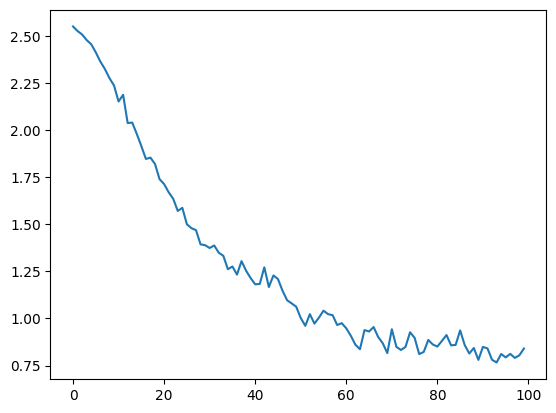

In [16]:
plt.figure()
plt.plot(all_losses)

/tmp/ipykernel_4177/1655712744.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + intents, rotation=90)
/tmp/ipykernel_4177/1655712744.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + intents)


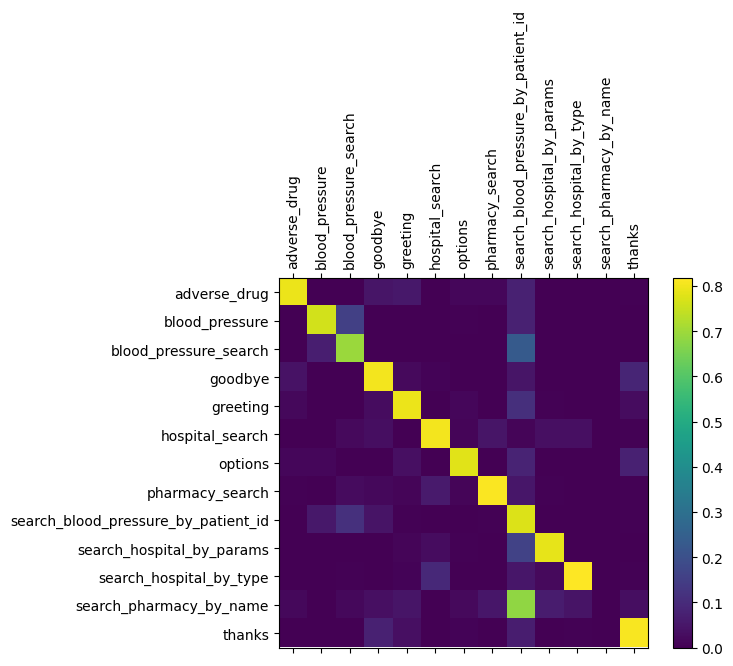

In [17]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    output, hidden = rnn(line_tensor, hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = intents.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + intents, rotation=90)
ax.set_yticklabels([''] + intents)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [18]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(torch.from_numpy(bag_of_words(input_line, words, lemmatizer)).view(1, -1))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, intents[category_index]))
            predictions.append([value, intents[category_index]])

predict('Hey there!')
predict('Thanks for that!')
predict('Find me a hospital')


> Hey there!
(-1.74) search_blood_pressure_by_patient_id
(-1.89) goodbye
(-2.58) thanks

> Thanks for that!
(-0.58) thanks
(-1.29) goodbye
(-3.37) search_blood_pressure_by_patient_id

> Find me a hospital
(-0.09) hospital_search
(-4.01) search_hospital_by_type
(-5.03) thanks


In [19]:
# Save the model
torch.save(rnn, '../clean_data/models/intents_classifier.pth')